In [1]:
import sys
sys.path.insert(0,'/home/leo/Documents/cosmic_ray_generator/')
import functions
from rejection_sampler import generator
import numpy
import matplotlib.pyplot as plt
import pandas as pd
from scipy import optimize


In [77]:
gen = generator(times=True,with_angles=True,detector_area=900,llim=200,ulim=10000)

In [78]:
a=gen.create(200000)

/home/leo/Documents/cosmic_ray_generator/functions.py:13: RuntimeWarning: invalid value encountered in power
  return ((lambda_N*np.cos(theta))/X_0)**p_1 * ((E_mu)/(E_mu + alphax0/np.cos(theta)))**(p_1 + gamma + 1) * spec.gamma(p_1 + 1)


In [4]:
a

array([[1.20958246e+00, 5.72560528e-01, 2.20407326e-03],
       [6.62606403e+00, 8.19731590e-01, 3.70030062e-03],
       [5.66682824e+00, 5.44141500e-01, 2.95527612e-02],
       ...,
       [2.83839628e+00, 9.01114218e-01, 4.08910987e+03],
       [8.08128366e+00, 8.45640042e-01, 4.08911074e+03],
       [8.80145852e-01, 3.21386874e-01, 4.08912166e+03]])

In [79]:
numpy.mean([a[i][0] for i in range(len(a))])

360.9388198644088

In [80]:
def binn(data,bins):
    b=[]
    for i in range(len(bins)-1):
        a=[]
        for j in data:
            if j<=bins[i+1] and j>=bins[i]:
                a.append(j)
        b.append(a)
    return b

In [59]:
b=numpy.histogram([numpy.log10(a[i][0]) for i in range(len(a)) if a[i][1]<0.09966],bins=[0.1*i for i in range(60)])

In [86]:
bins=[-2+0.1*i for i in range(60)]
binned=binn([numpy.log10(a[i][0]) for i in range(len(a))],bins)
d=binned

In [87]:
c=pd.DataFrame({'freq':[len(d[i]) for i in range(len(d))],'p_average':[numpy.log10(numpy.mean([10**d[i][j] for j in range(len(d[i]))])) for i in range(len(d))],\
    'p_range':[10**bins[i+1]-10**bins[i] for i in range(len(bins)-1)]})
c=c.drop([i for i in range(len(c['freq'])) if c['freq'][i]<5])

/home/leo/miniconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/leo/miniconda3/lib/python3.8/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


In [55]:
vertical_c=[a[i][0] for i in range(len(a)) if a[i][1]<numpy.radians(34) and a[i][1]>numpy.radians(24)]
bins=[-3+0.1*i for i in range(60)]
d=binn([numpy.log10(vertical_c[i]) for i in range(len(vertical_c))],bins)
c=pd.DataFrame({'freq':[len(d[i]) for i in range(len(d))],'p_average':[numpy.log10(numpy.mean([10**d[i][j] for j in range(len(d[i]))])) for i in range(len(d))],\
    'p_range':[10**bins[i+1]-10**bins[i] for i in range(len(bins)-1)]})
c=c.drop([i for i in range(len(c['freq'])) if c['freq'][i]<1])

/home/leo/miniconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/leo/miniconda3/lib/python3.8/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


In [45]:
numpy.sum([len(d[i]) for i in range(len(d))])

2635

In [93]:
angle_c=[a[i][1] for i in range(len(a)) if a[i][0]>540]
bins=[numpy.deg2rad(5*i) for i in range(0,18)]
d=binn(angle_c, bins)
c=pd.DataFrame({'freq':[len(d[i]) for i in range(len(d))],'zenith angle':[numpy.rad2deg((bins[i]+bins[i+1])/2) for i in range(17)]})

In [91]:
c

,freq,zenith angle
0,4729,2.5
1,4868,7.5
2,4824,12.5
3,4950,17.5
4,4935,22.5
5,5026,27.5
6,5372,32.5
7,5535,37.5
8,5831,42.5
9,6197,47.5


In [63]:
c['diff_int']=c['freq']/c['p_range']
c=c.drop([i for i in range(len(c['freq'])) if c['freq'][i]<=1])
c

KeyError: 0

In [89]:
c['diff_int']=c['freq']/(c['p_range']*(2.56*10**4*4*numpy.pi*(1-numpy.cos(numpy.deg2rad(1)))))
c['p_average']=10**c['p_average']
c

,freq,p_average,p_range,diff_int
43,77167,222.585221,51.662412,30.485505
44,48398,279.950339,65.039123,15.187602
45,29849,352.478114,81.879405,7.440319
46,18075,443.637837,103.080063,3.578822
47,10768,558.338033,129.770111,1.693545
48,6402,702.387415,163.370890,0.799793
49,3939,884.589496,205.671765,0.390884
50,2267,1110.268403,258.925412,0.178695
51,1366,1398.370317,325.967781,0.085529
52,756,1761.681074,410.369123,0.037600


In [52]:
numpy.sum(c['diff_int'])*10**4

1009535.9170831874

In [15]:
numpy.sum(c['freq'])/(0.03*10**4*7.42*10**3)

0.00019451931716082659

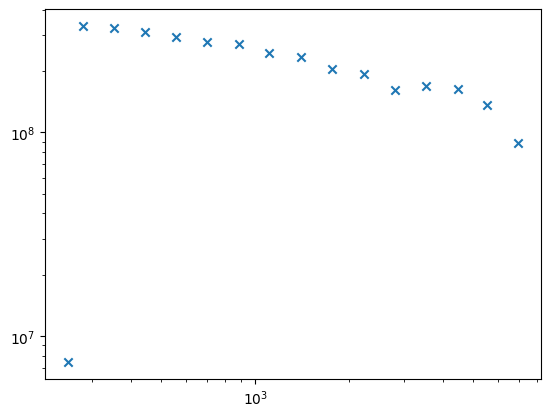

In [84]:
plt.scatter(c['p_average'],c['diff_int']*(c['p_average'])**3, marker='x')
plt.yscale('log')
plt.xscale('log')
plt.show()

In [25]:
1/(2*numpy.tan(numpy.deg2rad(1)))

28.644980815379714

In [94]:
with open('gen_data_angle.npy','wb') as f:
    numpy.save(f,c)
c

,freq,zenith angle
0,705,2.5
1,758,7.5
2,690,12.5
3,773,17.5
4,723,22.5
5,774,27.5
6,841,32.5
7,876,37.5
8,925,42.5
9,1034,47.5


In [48]:
def exp(x, params):
    a=params
    return a/(numpy.cos(numpy.deg2rad(x)))
def res(params,x,y):
    return y-exp(x,params)
def fit(data):
    popt=optimize.leastsq(res,x0=numpy.array([100]),args=(data[0],data[1]))
    print(popt)
    return(popt[0])

NameError: name 'fit' is not defined

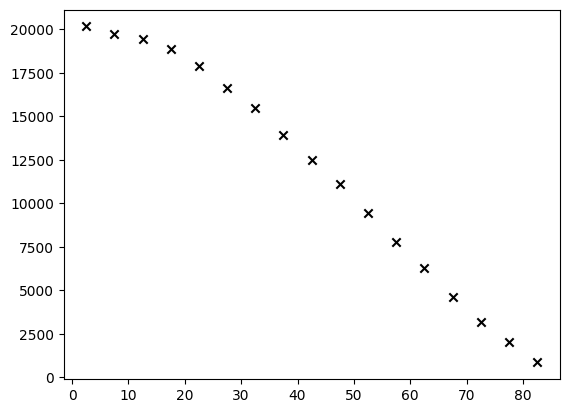

In [15]:
x=numpy.linspace(0,80,10000)
plt.scatter(c['zenith angle'],c['freq'], marker='x', label='generator data', color='black')
# p=fit([c['zenith angle'],c['freq']])
# p1=p[0]
# p2=p[1]
# y=p1*numpy.cos(numpy.deg2rad(x))**p2
# plt.plot(x, y, color='m', label='cos^2.19')
# plt.plot(x,p1*numpy.cos(numpy.deg2rad(x))**2, label='cos^2', color='r')
p=fit([c['zenith angle'],c['freq']])
plt.plot(x,500/(numpy.cos(numpy.deg2rad(x))), label='sec')
#plt.plot(x, 1/numpy.cos(numpy.deg2rad(x)))
plt.legend()

In [55]:
min([a[i][0] for i in range(len(a))])

0.005347106226905041

In [45]:
p[0]

20813.090457043243